**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [128]:
import torch
import numpy as np

In [129]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [130]:
# Перетворення вхідних даних і цілей у тензори
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

# Виведення результатів
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

Targets:
 tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])


Ми перетворили масиви NumPy на тензори PyTorch та вивели вхідні дані та таргети у форматі тензорів:

inputs: кожен рядок — це екземпляр з трьох вхідних характеристик для кожного спостереження.

targets: кожен елемент — це мітка класу (0 або 1), яка вказує, чи кількість яблук перевищує 80.

2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [131]:
torch.random.manual_seed(1)

In [132]:
inputs.shape[1]

3

In [133]:
# Ініціалізація ваг і зміщення
w = torch.randn(1, 3, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Виведення результату
print("Ваги w:\n", w)
print("\nЗміщення b:\n", b)

Ваги w:
 tensor([[0.6614, 0.2669, 0.0617]], requires_grad=True)

Зміщення b:
 tensor([0.6213], requires_grad=True)


Ми ініціалізували w (ваги) як випадкові значення з нормального розподілу (за допомогою torch.randn), де розмірність ваг — це 1 рядок з 3 значеннями (для трьох вхідних характеристик).

Ми також ініціалізували b (bias) як випадкове значення з нормального розподілу. Воно має розмірність 1.

Наші параметри мають властивість requires_grad=True, це означає, що PyTorch буде автоматично обчислювати похідні (градієнти) для цих параметрів під час зворотного поширення помилки (backpropagation). Це необхідно для коректного оновлення ваг і зміщення (bias) за допомогою алгоритму градієнтного спуску під час тренування моделі.

3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [134]:
import torch

def model(x, w, b):
    # Обчислюємо лінійну комбінацію
    z = x @ w.t() + b

    # Обчислюємо сигмоїду
    y_pred = 1 / (1 + torch.exp(-z))

    return y_pred


In [135]:
#z=inputs @ w.t() + b

In [136]:
#z

tensor([[69.4361],
        [88.2410],
        [97.5041],
        [81.8390],
        [76.1967]], grad_fn=<AddBackward0>)

In [137]:
# Передбачення
y_pred = model(inputs, w, b)
print(y_pred)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<MulBackward0>)


Модель на цьому етапі передбачає, що всі приклади належать до класу 1. Це свідчить про те, що початкові випадково задані ваги w та зміщення b дали великі додатні значення z. У результаті сигмоїдна функція, яка різко наближається до 1 при великих позитивних вхідних значеннях, видає передбачення, близькі до 1 для всіх прикладів.


4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [81]:
def binary_cross_entropy(predicted_probs, true_labels):
    # Додаємо мале число (epsilon), щоб уникнути log(0)
    eps = 1e-7
    predicted_probs = torch.clamp(predicted_probs, eps, 1 - eps)

    # Формула бінарної крос-ентропії
    loss = - (true_labels * torch.log(predicted_probs) + (1 - true_labels) * torch.log(1 - predicted_probs))

    # Вертаємо середнє значення втрат
    return loss.mean()


In [82]:
loss = binary_cross_entropy(y_pred, targets)
print("Loss:", loss.item())

Loss: 6.376954078674316


Наш код обчислює втрати за допомогою функції бінарної крос-ентропії для логістичної регресії.

Функція виводить середнє значення втрат, що становить 6.37.

На даному етапі тренування модель робить помилки при прогнозуванні, які є досить великими.

5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [83]:
# Обчислимо gradients
loss.backward()

In [84]:
# Градієнти вагів
print(w)
print(w.grad)

tensor([[0.6614, 0.2669, 0.0617]], requires_grad=True)
tensor([[0., 0., 0.]])


In [85]:
# Градієнти для bias
print(b)
print(b.grad)

tensor([0.6213], requires_grad=True)
tensor([0.])


Ми обчислили градієнти для параметрів моделі (ваг і зміщень) на основі функції втрат. Оскільки градієнти рівні нулю, це означає, що модель не оновлює свої параметри під час тренування. Модель не може ефективно навчатися.

**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [138]:
torch.random.manual_seed(1)
w = torch.randn(1, 3, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# in-place операції
w.data = w.data / 1000
b.data = b.data / 1000

In [139]:
y_pred = model(inputs, w, b)
print(y_pred)

tensor([[0.5174],
        [0.5220],
        [0.5244],
        [0.5204],
        [0.5190]], grad_fn=<MulBackward0>)


In [140]:
loss = binary_cross_entropy(y_pred, targets)
print("Loss:", loss.item())

Loss: 0.6829456686973572


In [89]:
# Обчислимо gradients
loss.backward()

In [90]:
# Градієнти вагів
print(w)
print(w.grad)

tensor([[6.6135e-04, 2.6692e-04, 6.1677e-05]], requires_grad=True)
tensor([[ -5.4417, -18.9853, -10.0682]])


In [91]:
# Градієнти для bias
print(b)
print(b.grad)

tensor([0.0006], requires_grad=True)
tensor([-0.0794])


Ми зробили значення ваг дуже малими, при цьому вони залишилися тензорами, для яких PyTorch відслідковує градієнти.

Градієнти ваг стали великими й від’ємними (-5.4417, -18.9853, -10.0682), що вказує на напрямок, у якому модель має змінювати ваги, щоб зменшити втрати.

Зміщення b також має мале значення (0.0006), а його градієнт становить -0.0794.

Після зменшення ваг в 1000 разів, сума втрат значно зменшилась (з ~6.38 до ~0.68), що вказує на покращення роботи моделі. Модель тепер близька до рандомного вгадування (передбачення біля 0.5), але вже не "зламана", як було раніше.


6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  1. Генерація прогнозів
  2. Обчислення втрат
  3. Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  4. Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  5. Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [93]:
# Генеруємо передбачення
preds = model(inputs, w, b)
print(preds)

tensor([[0.5174],
        [0.5220],
        [0.5244],
        [0.5204],
        [0.5190]], grad_fn=<MulBackward0>)


In [94]:
# Обчислюємо loss
loss = binary_cross_entropy(preds, targets)
print("Loss:", loss.item())

Loss: 0.6829456686973572


In [95]:
# Обчислюємо градієнти
loss.backward()

In [96]:
# Оновлюємо ваги і ресетимо градієнти
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [97]:
# Вихідні дані та ваги у нас вже є:
# inputs, targets, w, b, model(), binary_cross_entropy()

# Встановимо кількість епох і швидкість навчання
num_epochs = 1000
learning_rate = 1e-5

for epoch in range(num_epochs):
    # Передбачення
    y_pred = model(inputs, w, b)

    # Обчислення втрат
    loss = binary_cross_entropy(y_pred, targets)

    # Обчислення градієнтів
    loss.backward()

    # Оновлення ваг
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # Обнулення градієнтів
    w.grad.zero_()
    b.grad.zero_()

    # кожні 100 епох виводимо прогрес
    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

Epoch 100, Loss: 0.5619
Epoch 200, Loss: 0.5066
Epoch 300, Loss: 0.4646
Epoch 400, Loss: 0.4324
Epoch 500, Loss: 0.4071
Epoch 600, Loss: 0.3869
Epoch 700, Loss: 0.3705
Epoch 800, Loss: 0.3569
Epoch 900, Loss: 0.3454
Epoch 1000, Loss: 0.3357


In [99]:
y_pred

tensor([[0.5777],
        [0.6685],
        [0.9113],
        [0.1616],
        [0.8653]], grad_fn=<MulBackward0>)

In [100]:
# Округлимо ймовірності, бо нам потрібні класи 0 або 1
predicted_classes = (y_pred >= 0.5).float()
print("Передбачені класи:\n", predicted_classes)
print("Справжні класи (targets):\n", targets)

Передбачені класи:
 tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.]])
Справжні класи (targets):
 tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])


Ми ініціалізували тренувальний цикл на 1000 епох із маленьким коефіцієнтом навчання (learning_rate = 1e-5). Як бачимо модель правильно класифікувала 4 з 5 прикладів. ТОбто модель навчилася розрізняти більшість прикладів і робить адекватні передбачення.

**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [120]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [121]:
from torch.utils.data import TensorDataset, DataLoader

In [122]:
# Перетворення в тензори
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [123]:
# Створення датасету
train_ds = TensorDataset(inputs, targets)

In [124]:
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[0.],
         [1.],
         [1.]]))

Ми підготували дані для подальшого навчання моделі: конвертували inputs і targets у тензори та створили датасет train_ds за допомогою класу TensorDataset.

8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [107]:
from torch.utils.data import DataLoader

# Створення DataLoader
train_dl = DataLoader(train_ds, batch_size=5, shuffle=True)

# Виведення першого батчу
for batch in train_dl:
    inputs_batch, targets_batch = batch
    print(inputs_batch)
    print(targets_batch)
    break


tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [102.,  43.,  37.]])
tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]])


Ми підготували механізм для пакетної обробки даних, увімкнули shuffle=True, щоб дані випадково перемішувалися перед кожною епохою навчання, це допоможе уникнути залежності від порядку даних. Дані будуть подаватися в модель невеликими порціями (батчами), що дозволить ефективніше і стабільніше тренувати модель.

9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [108]:
import torch.nn as nn

# Клас логістичної регресії
class LogReg(nn.Module):
    def __init__(self):
        super(LogReg, self).__init__()
        self.linear = nn.Linear(3, 1)  # 3 входи, 1 вихід
        self.sigmoid = nn.Sigmoid()    # Сигмоїдна функція активації

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)        # Застосування сигмоїди
        return out


In [109]:
# Створюємо модель
model = LogReg()

# Виводимо структуру моделі
print(model)

LogReg(
  (linear): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


Ми створили клас LogReg, який наслідує властивості класу nn.Module.

В конструкторі __init__ ми визначили два шари:

self.linear — лінійний шар, який приймає на вхід 3 характеристики й видає одне значення.

self.sigmoid — сигмоїдна функція активації, яка перетворює вихід у значення в межах від 0 до 1.

У методі forward ми описали, що вхідні дані спочатку проходять через лінійний шар, а потім через сигмоїду для отримання ймовірності належності до класу.

Ми створили екземпляр класу LogReg в змінній model.


10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [110]:
import torch.optim as optim
import torch.nn.functional as F

# Оптимізатор
opt = optim.SGD(model.parameters(), lr=1e-5)


In [111]:
# Функція втрат
loss_fn = F.binary_cross_entropy

# Обчислення втрат
loss = loss_fn(model(inputs), targets)

print(loss)


tensor(7.6312, grad_fn=<BinaryCrossEntropyBackward0>)


Сума втрат 7.6312 є досить високою, що вказує на те, що модель ще не навилась добре. Модель передбачає результати, які значно відрізняються від істинних міток.

11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

In [112]:
def fit_return_loss(num_epochs, model, loss_fn, opt, train_dl):
    losses = []
    for epoch in range(num_epochs):
        # Ініціалізуємо акумулятор для втрат
        total_loss = 0

        for xb, yb in train_dl:
            # Генеруємо передбачення
            pred = model(xb)

            # Обчислюємо втрати
            loss = loss_fn(pred, yb)

            # Виконуємо градієнтний спуск
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Накопичуємо втрати
            total_loss += loss.item()

        # Обчислюємо середні втрати для епохи
        avg_loss = total_loss / len(train_dl)
        losses.append(avg_loss)

        # Виводимо підсумок епохи
        if (epoch + 1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

In [113]:
import matplotlib.pyplot as plt

# Навчання моделі
num_epochs = 1000
losses = fit_return_loss(num_epochs, model, loss_fn, opt, train_dl)


Epoch [10/1000], Loss: 6.6400
Epoch [20/1000], Loss: 6.0483
Epoch [30/1000], Loss: 5.7263
Epoch [40/1000], Loss: 5.4710
Epoch [50/1000], Loss: 5.2474
Epoch [60/1000], Loss: 5.0653
Epoch [70/1000], Loss: 4.8974
Epoch [80/1000], Loss: 4.7861
Epoch [90/1000], Loss: 4.6903
Epoch [100/1000], Loss: 4.5353
Epoch [110/1000], Loss: 4.4753
Epoch [120/1000], Loss: 4.3686
Epoch [130/1000], Loss: 4.2792
Epoch [140/1000], Loss: 4.2018
Epoch [150/1000], Loss: 4.1132
Epoch [160/1000], Loss: 4.0389
Epoch [170/1000], Loss: 3.9423
Epoch [180/1000], Loss: 3.8701
Epoch [190/1000], Loss: 3.7756
Epoch [200/1000], Loss: 3.6974
Epoch [210/1000], Loss: 3.6101
Epoch [220/1000], Loss: 3.5297
Epoch [230/1000], Loss: 3.4427
Epoch [240/1000], Loss: 3.3760
Epoch [250/1000], Loss: 3.2822
Epoch [260/1000], Loss: 3.1985
Epoch [270/1000], Loss: 3.1111
Epoch [280/1000], Loss: 3.0308
Epoch [290/1000], Loss: 2.9483
Epoch [300/1000], Loss: 2.8748
Epoch [310/1000], Loss: 2.7879
Epoch [320/1000], Loss: 2.7048
Epoch [330/1000],

На початку тренування сума втрат висока, але поступово зменшується, що свідчить про поступове покращення моделі.

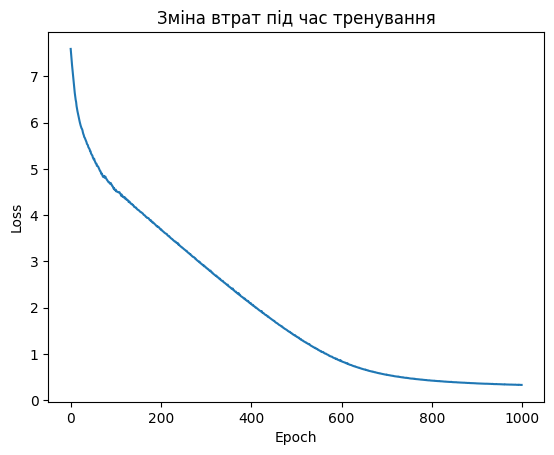

In [114]:
# Побудова графіку втрат
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Зміна втрат під час тренування')
plt.show()

На графіку ми можемо візуально побачити зміну суми втрат протягом тренування. Модель стабільно зменшує втрати під час навчання і після 900 епохи починає виходити на плато.

In [115]:
# Фінальні передбачення
preds = model(inputs)
print("\nПередбачення:\n", preds.detach())
print("\nТаргети:\n", targets)


Передбачення:
 tensor([[0.5729],
        [0.6791],
        [0.9026],
        [0.1569],
        [0.8761],
        [0.5729],
        [0.6791],
        [0.9026],
        [0.1569],
        [0.8761],
        [0.5729],
        [0.6791],
        [0.9026],
        [0.1569],
        [0.8761]])

Таргети:
 tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])


In [116]:
# Округлимо ймовірності, бо нам потрібні класи 0 або 1
y_pred_class = (preds >= 0.5).float()
print("Передбачені класи:\n", y_pred_class)
print("Справжні класи (targets):\n", targets)

Передбачені класи:
 tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.]])
Справжні класи (targets):
 tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])


In [125]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(targets, y_pred_class)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[3 3]
 [0 9]]


З початкових 6.64 на 10-й епосі, до кінця тренування сума втрат знизилася до 0.3297. Це свідчить про те, що модель навчалася і з кожною ітерацією покращувала свої передбачення.

Модель показала досить хороші результати, однак є деякі помилки: 3 приклади класу 0 модель помилково класифікувала як клас 1. З іншого боку, жоден приклад класу 1 не був помилково класифікований як клас 0.
